In [3]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
import datetime
from scipy import stats
warnings.filterwarnings('ignore')


data = pd.read_csv('dog_rates_tweets.csv').set_index(keys=['id'])
search_key = r'(\d+(\.\d+)?)/10'
rated_data = data.loc[data['text'].str.contains(search_key)]
rated_data['rating'] = rated_data['text'].str.extract(search_key, expand=False)[0].values


rated_data['rating'] = rated_data['rating'].astype(str).astype(float)
rated_data = rated_data[rated_data.rating <= 25.0]

rated_data['created_at'] = rated_data['created_at'].astype(str)
rated_data['created_at'] = pd.to_datetime(rated_data['created_at'].values, format='%Y-%m-%d %H:%M:%S')
first_day = rated_data['created_at'].values.min()
rated_data['timestamp'] = (rated_data['created_at'] - first_day) / np.timedelta64(1, 's')

x = rated_data['timestamp'].values
y = rated_data['rating'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

rated_data['predict'] = rated_data['timestamp'] * slope + intercept

# rated_data

In [4]:
# slope, intercept, p_value
print("slope: ", slope)
print("intercept: ", intercept)
print("p-value: ", p_value)

slope:  4.5650941366882184e-08
intercept:  10.490286831987644
p-value:  1.0836168506032591e-104


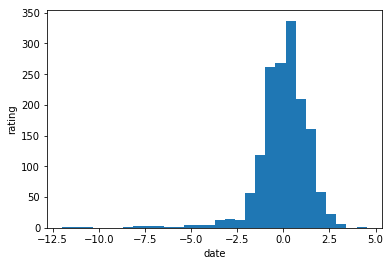

In [7]:
# plt.plot(rated_data['created_at'], rated_data['rating'], 'b.', alpha=0.5)
# plt.plot(rated_data['created_at'], rated_data['predict'], 'r-', linewidth=3)

plt.hist(rated_data['rating'] - rated_data['predict'], bins=30)

plt.xlabel('date')
plt.ylabel('rating')
plt.show()